In [4]:
import pandas as pd
import numpy as np

In [5]:
# path = r'C:\Users\DELL\Desktop\GP Paper\ARTIFACTS DATA ANALYSIS\MRI_ARTIFACTS_SHAZLONG.xlsx'
path = r'C:\Users\DELL\Desktop\GP Paper\ARTIFACTS DATA ANALYSIS\Artifacts.xlsx'

In [6]:
import pandas as pd

# Read in the xlsx file
df = pd.read_excel(path)

# Drop the the first two and the last column
df = df.iloc[1:, 3:-1]

# Drop any rows that contain NaN values
df = df.dropna()

# # Write the modified DataFrame back to a new xlsx file
# df.to_excel('new_file.xlsx', index=False)
df

,BLURRING,Unnamed: 4,Unnamed: 5,Unnamed: 6,RESOLUTION,Unnamed: 8,Unnamed: 9,Unnamed: 10,CONTRAST,Unnamed: 12,Unnamed: 13,Unnamed: 14,MAGNETIC SUSCIPTABILITY,Unnamed: 16,Unnamed: 17,Unnamed: 18,RINGING,Unnamed: 20,Unnamed: 21,Unnamed: 22
100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101,2,2,2,2,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0
102,2,2,2,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1248,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1249,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
new_df = pd.DataFrame()
# Sum every four consecutive columns and add the result to new_df
for i in range(0, len(df.columns), 4):
    col_sum = df.iloc[:, i:i+4].sum(axis=1)
    new_df[f'sum_{i//4+1}'] = col_sum

# Binarize the new_df
binarized_df = np.where(new_df > 0, 1, 0)

# Create a new dataframe with binarized data
binarized_df = pd.DataFrame(binarized_df, columns=new_df.columns, index=new_df.index)

# # Write the binarized dataframe to a new csv file
# binarized_df.to_csv('binarized_file.csv', index=False)

In [5]:
# Create a list with your new header names
new_header = ['Bluring', 'Resolution', 'Contrast', 'Mag', 'Ringing']

# Assign the new header to your dataframe
new_df.columns = new_header

In [6]:
new_df

,Bluring,Resolution,Contrast,Mag,Ringing
100,0.0,0.0,0.0,0.0,0.0
101,8.0,0.0,5.0,0.0,0.0
102,8.0,0.0,1.0,0.0,1.0
103,0.0,0.0,0.0,0.0,0.0
104,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...
1247,0.0,0.0,0.0,0.0,0.0
1248,0.0,0.0,1.0,0.0,0.0
1249,1.0,0.0,1.0,0.0,0.0
1250,0.0,0.0,0.0,0.0,0.0


In [7]:
# Binarize the new_df
binarized_df = np.where(new_df > 0, 1, 0)

# Create a new dataframe with binarized data
binarized_df = pd.DataFrame(binarized_df, columns=new_df.columns, index=new_df.index)

In [8]:
binarized_df

,Bluring,Resolution,Contrast,Mag,Ringing
100,0,0,0,0,0
101,1,0,1,0,0
102,1,0,1,0,1
103,0,0,0,0,0
104,0,1,0,0,0
...,...,...,...,...,...
1247,0,0,0,0,0
1248,0,0,1,0,0
1249,1,0,1,0,0
1250,0,0,0,0,0


In [9]:
total_rows = binarized_df.shape[0]
total_rows

830

In [10]:
# Sum the ones in each column and store the results in a dictionary
sum_dict = {}
for col in binarized_df.columns:
    sum_dict[col] = binarized_df[col].sum()

# Print the results
for col, count in sum_dict.items():
    print(f"Column '{col}' has {count} ones.")

Column 'Bluring' has 239 ones.
Column 'Resolution' has 99 ones.
Column 'Contrast' has 211 ones.
Column 'Mag' has 15 ones.
Column 'Ringing' has 249 ones.


In [11]:
Blur = (239 / total_rows) * 100
Resol = (99 / total_rows) * 100
Cont = (211 / total_rows) * 100
Mag = (15 / total_rows) * 100
Ring = (249 / total_rows) * 100

In [12]:
    print(f"Column '{col}' has {count} ones.")
print(Blur, Resol, Cont, Mag, Ring)

Column 'Ringing' has 249 ones.
28.795180722891565 11.927710843373495 25.421686746987955 1.8072289156626504 30.0


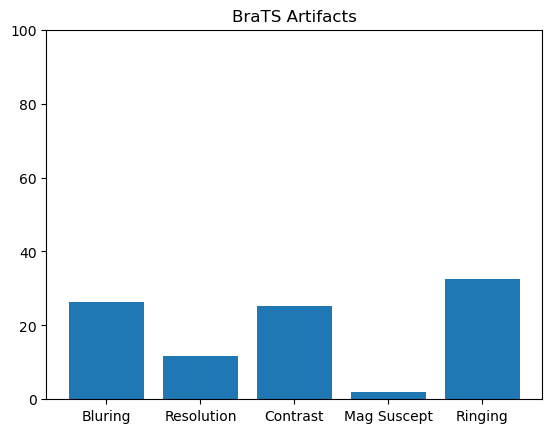

In [53]:
import matplotlib.pyplot as plt

# Define your percentages
percentages = [28.795180722891565, 11.927710843373495, 25.421686746987955, 1.8072289156626504, 30.0]

# Define the labels for the x-axis
labels = ['Bluring', 'Resolution', 'Contrast', 'Mag Suscept', 'Ringing']

# Create a bar plot
plt.bar(labels, percentages)
plt.ylim(top=100)

# Add a title to the plot
plt.title('BraTS Artifacts')

# Add labels to the x-axis and y-axis
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

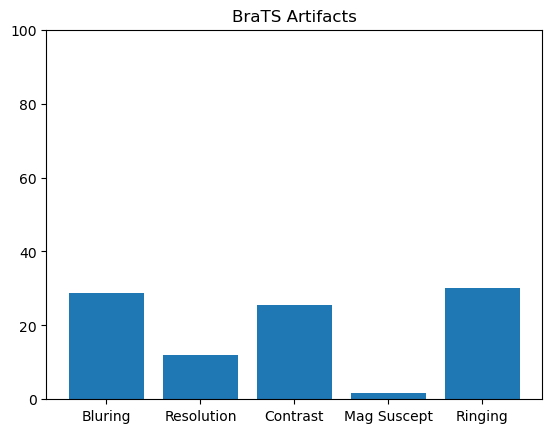

In [13]:
import matplotlib.pyplot as plt

# Define your percentages
percentages = [28.795180722891565, 11.927710843373495, 25.421686746987955, 1.8072289156626504, 30.0]

# Define the labels for the x-axis
labels = ['Bluring', 'Resolution', 'Contrast', 'Mag Suscept', 'Ringing']

# Create a bar plot
plt.bar(labels, percentages)
plt.ylim(top=100)

# Add a title to the plot
plt.title('BraTS Artifacts')

# Add labels to the x-axis and y-axis
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [19]:
excel_file = r'C:\Users\DELL\Desktop\GP Paper\ARTIFACTS DATA ANALYSIS\MRI_ARTIFACTS_SHAZLONG.xlsx'

df = pd.read_excel(excel_file, na_values="NaN")
# df.pop(df.columns[-1])
# df.pop([df.columns[0], df.columns[1], df.columns[2]])
df.drop(columns=[df.columns[0], df.columns[1], df.columns[2]], axis = 1, inplace=True)
df.drop(0, inplace=True)
df.head()
# print(df)
# print("I am here")
# df.dropna(axis=0, how="any")
# print(df)

,BLURRING,Unnamed: 4,Unnamed: 5,Unnamed: 6,RESOLUTION,Unnamed: 8,Unnamed: 9,Unnamed: 10,CONTRAST,Unnamed: 12,...,Unnamed: 14,MAGNETIC SUSCIPTABILITY,Unnamed: 16,Unnamed: 17,Unnamed: 18,RINGING,Unnamed: 20,Unnamed: 21,Unnamed: 22,NOTES
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(axis=0, how="any")  #(1252, 24)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,BLURRING,Unnamed: 4,Unnamed: 5,Unnamed: 6,RESOLUTION,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,MAGNETIC SUSCIPTABILITY,Unnamed: 16,Unnamed: 17,Unnamed: 18,RINGING,Unnamed: 20,Unnamed: 21,Unnamed: 22,NOTES
101,101,Case 00139,0.813828,2,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Vertical lines going up
103,103,Case 00142,0.852221,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,gradinet inlinearity t1 t1ce
106,106,Case 00146,0.785027,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,final flair slices are fading differently
107,107,Case 00147,0.905151,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Salt and pepper and a with speck in the csf
116,116,Case 00157,0.945582,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,Werid chunks of intensity at the edges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,1239,Case 01654,0.94755,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,window level adjust maybe
1241,1241,Case 01656,0.958359,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,brain looks long
1245,1245,Case 01660,0.887139,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"weird vertical lines, idk if it ringing"
1248,1248,Case 01663,0.946499,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,grad inhomo t1


In [1]:
import pandas as pd
import numpy as np

In [2]:
# path = r'C:\Users\DELL\Desktop\GP Paper\ARTIFACTS DATA ANALYSIS\MRI_ARTIFACTS_SHAZLONG.xlsx'
path = r'C:\Users\DELL\Desktop\GP Paper\ARTIFACTS DATA ANALYSIS\mri artifacts final.xlsx'

In [3]:
import pandas as pd

# Read in the xlsx file
df = pd.read_excel(path)

# convert all values to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop the the first two and the last column
df = df.iloc[1:, 3:-7]

# Drop any rows that contain NaN values
df = df.dropna()

# # Write the modified DataFrame back to a new xlsx file
# df.to_excel('new_file.xlsx', index=False)
df

,BLURRING,Unnamed: 4,Unnamed: 5,Unnamed: 6,RESOLUTION,Unnamed: 8,Unnamed: 9,Unnamed: 10,CONTRAST,Unnamed: 12,Unnamed: 13,Unnamed: 14,MAGNETIC SUSCIPTABILITY,Unnamed: 16,Unnamed: 17,Unnamed: 18,RINGING,Unnamed: 20,Unnamed: 21,Unnamed: 22
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.head(10)

,BLURRING,Unnamed: 4,Unnamed: 5,Unnamed: 6,RESOLUTION,Unnamed: 8,Unnamed: 9,Unnamed: 10,CONTRAST,Unnamed: 12,Unnamed: 13,Unnamed: 14,MAGNETIC SUSCIPTABILITY,Unnamed: 16,Unnamed: 17,Unnamed: 18,RINGING,Unnamed: 20,Unnamed: 21,Unnamed: 22
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
new_df = pd.DataFrame()

# Sum every four consecutive columns and add the result to new_df
for i in range(0, len(df.columns), 4):
    col_sum = df.iloc[:, i:i+4].sum(axis=1)
    new_df[f'sum_{i//4+1}'] = col_sum

# Binarize the new_df
binarized_df = np.where(new_df > 0, 1, 0)

# Create a new dataframe with binarized data
binarized_df = pd.DataFrame(binarized_df, columns=new_df.columns, index=new_df.index)

# # Write the binarized dataframe to a new csv file
# binarized_df.to_csv('binarized_file.csv', index=False)

In [6]:
binarized_df

,sum_1,sum_2,sum_3,sum_4,sum_5
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
...,...,...,...,...,...
1247,0,0,0,0,0
1248,0,0,1,0,0
1249,1,0,1,0,0
1250,0,0,0,0,0


In [7]:
# Create a list with your new header names
new_header = ['Bluring', 'Resolution', 'Contrast', 'Mag', 'Ringing']

# Assign the new header to your dataframe
new_df.columns = new_header

In [8]:
new_df

,Bluring,Resolution,Contrast,Mag,Ringing
1,1.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1247,0.0,0.0,0.0,0.0,0.0
1248,0.0,0.0,1.0,0.0,0.0
1249,1.0,0.0,1.0,0.0,0.0
1250,0.0,0.0,0.0,0.0,0.0


In [9]:
# Binarize the new_df
binarized_df = np.where(new_df > 0, 1, 0)

# Create a new dataframe with binarized data
binarized_df = pd.DataFrame(binarized_df, columns=new_df.columns, index=new_df.index)

In [10]:
binarized_df

,Bluring,Resolution,Contrast,Mag,Ringing
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
...,...,...,...,...,...
1247,0,0,0,0,0
1248,0,0,1,0,0
1249,1,0,1,0,0
1250,0,0,0,0,0


In [11]:
total_rows = binarized_df.shape[0]
total_rows

1244

In [12]:
# Sum the ones in each column and store the results in a dictionary
sum_dict = {}
for col in binarized_df.columns:
    sum_dict[col] = binarized_df[col].sum()
artifact = []
    
# Print the results
for col, count in sum_dict.items():
    print(f"Column '{col}' has {count} ones.")
    artifact.append(count)

Column 'Bluring' has 339 ones.
Column 'Resolution' has 119 ones.
Column 'Contrast' has 249 ones.
Column 'Mag' has 23 ones.
Column 'Ringing' has 344 ones.


In [13]:
Blur = (artifact[0] / total_rows) * 100
Resol = (artifact[1] / total_rows) * 100
Cont = (artifact[2] / total_rows) * 100
Mag = (artifact[3] / total_rows) * 100
Ring = (artifact[4] / total_rows) * 100

In [14]:
    print(f"Column '{col}' has {count} ones.")
print(Blur, Resol, Cont, Mag, Ring)

Column 'Ringing' has 344 ones.
27.2508038585209 9.565916398713826 20.016077170418008 1.8488745980707395 27.652733118971064


In [15]:
print(f"{Blur:.1f} % Blurring \n{Resol:.1f} % Resolution\n{Cont:.1f} % Contrast\n{Mag:.1f} % Magnetic Susceptibility \n{Ring:.1f} % Ringing ")

27.3 % Blurring 
9.6 % Resolution
20.0 % Contrast
1.8 % Magnetic Susceptibility 
27.7 % Ringing 


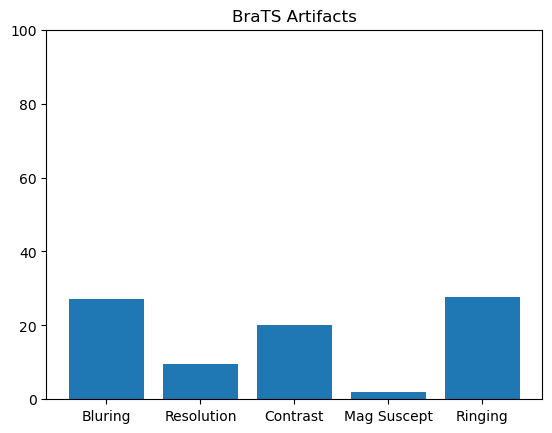

In [16]:
import matplotlib.pyplot as plt

# Define your percentages
percentages = [Blur, Resol, Cont, Mag, Ring]

# Define the labels for the x-axis
labels = ['Bluring', 'Resolution', 'Contrast', 'Mag Suscept', 'Ringing']

# Create a bar plot
plt.bar(labels, percentages)
plt.ylim(top=100)

# Add a title to the plot
plt.title('BraTS Artifacts')

# Add labels to the x-axis and y-axis
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [17]:
blur_df = df.iloc[:, 0:4]
resol_df = df.iloc[:, 4:8]
cont_df = df.iloc[:, 8:12]
mag_df = df.iloc[:, 12:16]
ring_df = df.iloc[:, 16:20]

In [29]:
# Count the number of non-zero values in each column
num_nonzero_col1 = (ring_df.iloc[:, 0] != 0).sum()
num_nonzero_col2 = (ring_df.iloc[:, 1] != 0).sum()
num_nonzero_col3 = (ring_df.iloc[:, 2] != 0).sum()
num_nonzero_col4 = (ring_df.iloc[:, 3] != 0).sum()

# Print the results
print("T1: ", num_nonzero_col1)
print("T2: ", num_nonzero_col2)
print("T1c: ", num_nonzero_col3)
print("FLAIR: ", num_nonzero_col4)


T1:  140
T2:  51
T1c:  245
FLAIR:  170


In [18]:
# art_df = [blur_df, resol_df, cont_df, mag_df, ring_df]
# columns = ["T1", "T2", "T1c", "FLAIR"]
# for adf in art_df:
#     adf = adf[~(adf == 0).all(axis=1)]
#     adf = np.where(adf > 0, 1, 0)
#     adf = pd.DataFrame(adf, columns=columns) #, index=new_df.index

import pandas as pd
import numpy as np

art_df = [blur_df, resol_df, cont_df, mag_df, ring_df]
columns = ["T1", "T2", "T1c", "FLAIR"]

for i, adf in enumerate(art_df):
    art_df[i] = adf[~(adf == 0).all(axis=1)]
    art_df[i] = np.where(art_df[i] > 0, 1, 0)
    art_df[i] = pd.DataFrame(art_df[i], columns=columns)


In [19]:
art_df[0]

,T1,T2,T1c,FLAIR
0,1,0,0,0
1,1,1,1,1
2,1,1,1,1
3,1,0,0,0
4,1,1,1,1
...,...,...,...,...
334,0,0,1,0
335,1,0,0,0
336,0,0,0,1
337,0,0,0,1


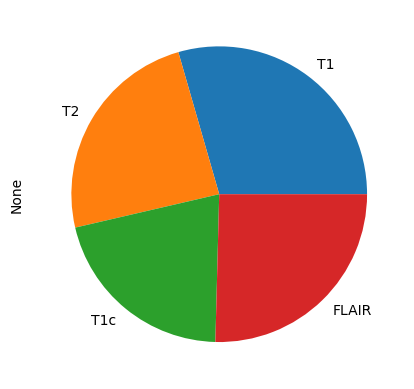

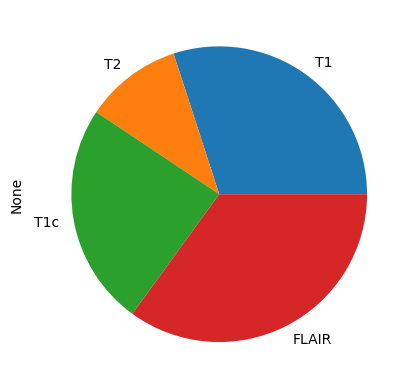

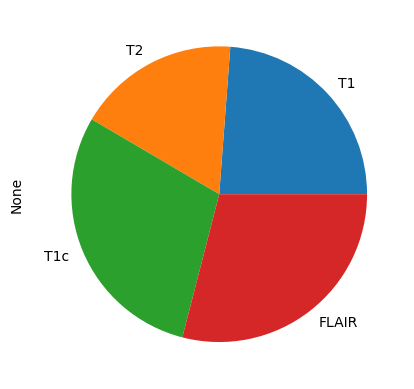

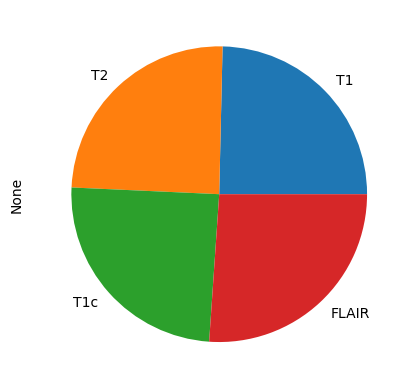

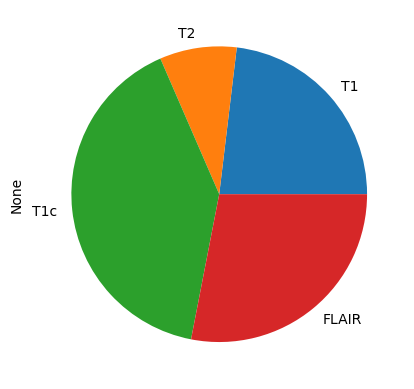

In [20]:
for df in art_df:
    # calculate the sum of each column and create a pie plot
    sums = df.sum()
    sums.plot.pie()
    plt.title("")
    plt.show()

In [72]:
# drop any row that contains only zeros
blur_df = blur_df[~(blur_df == 0).all(axis=1)]
resol_df = resol_df[~(resol_df == 0).all(axis=1)]
cont_df = cont_df[~(cont_df == 0).all(axis=1)]
mag_df = mag_df[~(mag_df == 0).all(axis=1)]
ring_df = ring_df[~(ring_df == 0).all(axis=1)]

# Binarize the new_df
blur_df = np.where(blur_df > 0, 1, 0)
resol_df = np.where(resol_df > 0, 1, 0)
cont_df = np.where(cont_df > 0, 1, 0)
mag_df = np.where(mag_df > 0, 1, 0)
ring_df = np.where(ring_df > 0, 1, 0)

# Create a new dataframe with binarized data
binarized_df = pd.DataFrame(binarized_df, columns=new_df.columns, index=new_df.index)

In [73]:
# Sum the ones in each column and store the results in a dictionary
sum_dict_blur = {}
for col in blur_df.columns:
    sum_dict_blur[col] = blur_df[col].sum()
# artifact = []
    
# Print the results
for col, count in sum_dict_blur.items():
    print(f"Column '{col}' has {count} ones.")
#     artifact.append(count)
    
    

AttributeError: 'numpy.ndarray' object has no attribute 'columns'